
# ***Diabetes Classification with Data Cleaning and Analysis.***

- The goal of this project is to clean and analyze medical data related to diabetes and build a classification model to predict whether a patient has diabetes

-Lina Abdullah Alghamdi


# **Load Data from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/diabetes.csv"
df = pd.read_csv(path)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

The shape of the dataset is (768, 9), which means that the data contains 768 records (patients) and 9 columns(8 features + 1 target). Each row represents a single patient, while the columns represent medical features and one target variable. This indicates that the dataset has a moderate size and is suitable for a binary classification task(outcome = 1 or 0).

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Data Quality Check**

Data quality check is an essential step to understand the reliability of the dataset before analysis and model building. In this step, the dataset is examined to identify missing values, invalid entries, and potential issues that may affect the performance of the classification model.

**we check in this step:**

Data types of each column

Presence of missing values

Invalid or unrealistic values (such as zeros in medical measurements)

Basic statistical summary of the data

In [ ]:
# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


-There are no explicit missing values (NaN) in the dataset, and all columns have appropriate numeric data types.

In [ ]:
# Check missing values
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


-The dataset does not contain explicit missing values

In [ ]:
# Statistical summary
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




*   The dataset contains 768 observations for all features, indicating no explicitly missing values.

* Several features such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a minimum value of 0, which is not medically realistic and indicates missing or incorrect data encoded as zeros.

* SkinThickness and Insulin show a (25%) equal to 0, quartile values are missing, making simple imputation less reliable.

* Insulin has a very large range (0 to 846) and a high standard deviation, indicating strong skewness and presence of outliers.

* Glucose and BMI have realistic median values and fewer zero entries, suggesting that median imputation is sufficient for these features.

* The noticeable differences between minimum, median, and maximum values across multiple features indicate that the data is not symmetrically distributed.

* Age and Pregnancies do not contain invalid zero values and show reasonable distributions.

* The target variable Outcome is binary (0 or 1), suitable for a classification problem.



In [ ]:
#Invalid or Unrealistic Zero Values
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [ ]:
(df[cols_with_invalid_zeros] == 0).sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


-Several medical features contain zero values that are not medically realistic and should be treated as missing values

-During the data quality check, it was observed that although the dataset does not contain explicit missing values, several medical features include zero values that are not medically realistic. These zero values appear in features such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI, and they represent missing measurements. Therefore, these values need to be handled during the data cleaning stage to ensure reliable analysis and model performance.

# **Data Cleaning**

In [ ]:
# Converting Invalid Values to Missing (NaN)
import numpy as np

cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'BMI']

df_clean = df.copy()
df_clean[cols_with_invalid_zeros] = df_clean[cols_with_invalid_zeros].replace(0, np.nan)


In [ ]:
df_clean.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,0
Insulin,0
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


-In this step, unrealistic zero values in medical features are converted to missing values (NaN). Medical measurements such as glucose level, blood pressure, BMI, insulin, and skin thickness cannot be zero in real-life scenarios. Therefore, zero values in these columns represent missing measurements rather than valid data and must be treated accordingly.

In [ ]:
#Handling Missing Values (Imputation)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_clean[cols_with_invalid_zeros] = imputer.fit_transform(df_clean[cols_with_invalid_zeros])


-After identifying missing values, median imputation is applied to replace them. The median is chosen because it is robust to outliers and provides a more reliable estimate for medical data compared to the mean, which can be heavily influenced by extreme values

In [ ]:
#Data Validation
df_clean.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Validate cleaned data to ensure no missing values and realistic ranges
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
knn_features = ['SkinThickness', 'Insulin']
df_knn = df.copy()
df_knn[knn_features] = df_knn[knn_features].replace(0, np.nan)

In [ ]:
df_knn.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,227
Insulin,374
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_knn_scaled = scaler.fit_transform(df_knn[knn_features])

imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = imputer.fit_transform(df_knn_scaled)
df_knn[knn_features] = scaler.inverse_transform(df_knn_imputed)


In [ ]:
df_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,154.829488,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,89.015488,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,105.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,159.100000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_hybrid = df_clean.copy()
df_hybrid[knn_features] = df_knn[knn_features]


In [ ]:
df_hybrid.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df_hybrid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.153420,154.829488,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.790942,89.015488,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,105.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,159.100000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Exploratory Data Analysis _EDA**

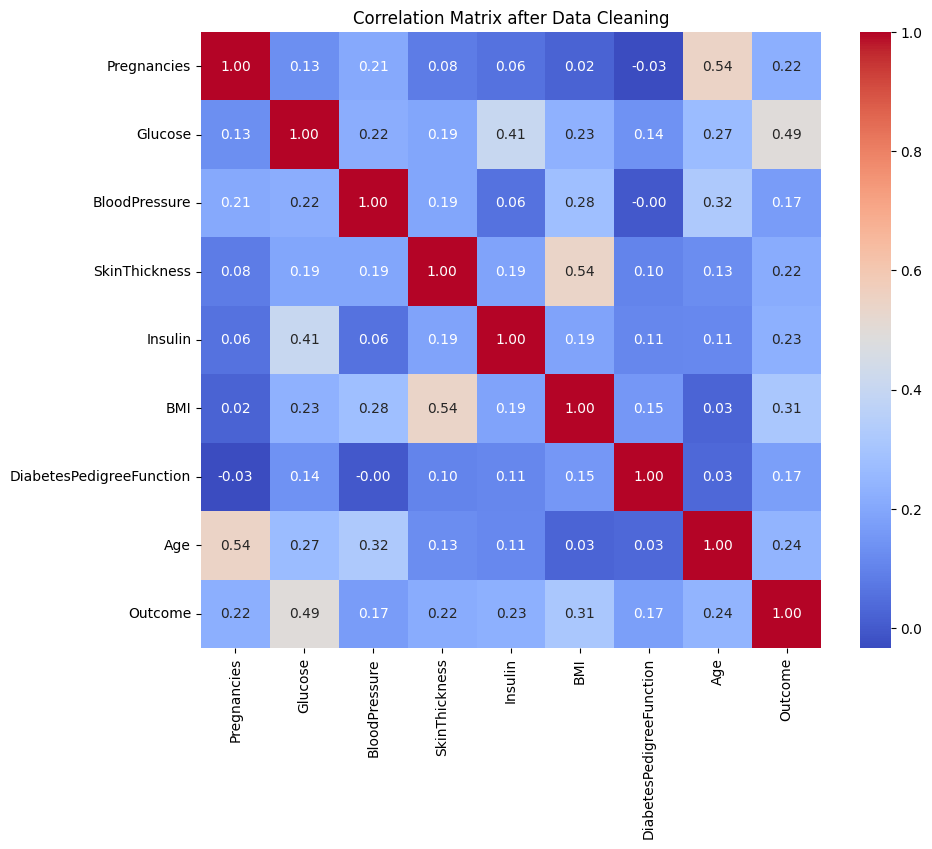

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df_hybrid.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix after Data Cleaning')
plt.show()

The correlation heatmap shows that Glucose has the strongest association with diabetes outcome, while no severe multicollinearity is observed, supporting the suitability of logistic regression.

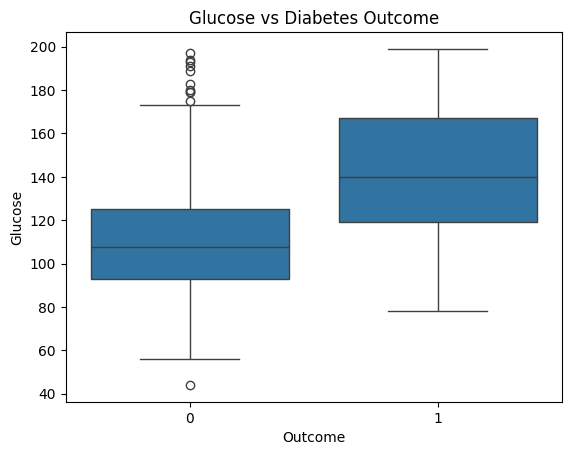

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Outcome', y='Glucose', data=df_hybrid)
plt.title('Glucose vs Diabetes Outcome')
plt.show()


- The boxplot shows a clear difference in glucose levels between diabetic and non-diabetic patients. Patients with diabetes (Outcome = 1) tend to have significantly higher glucose levels compared to non-diabetic patients (Outcome = 0). This visual separation indicates a strong relationship between glucose level and diabetes outcome, confirming glucose as an important predictive feature.shows a noticeable overlap between diabetic and non-diabetic patients, indicating that glucose alone cannot perfectly separate the two classes

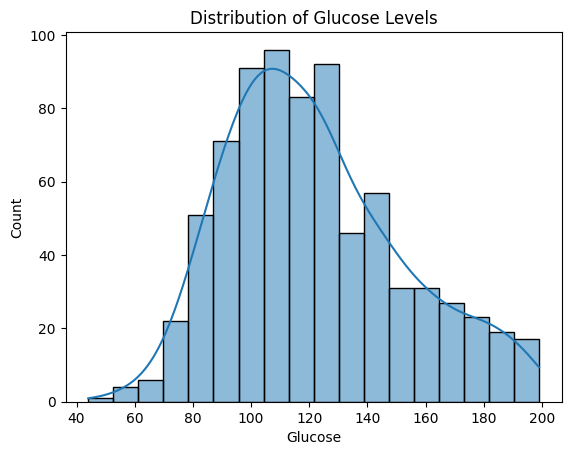

In [ ]:
sns.histplot(df_hybrid['Glucose'], kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()


- The histogram shows the distribution of glucose levels after data cleaning. Most glucose values are concentrated between 90 and 130, while the distribution is slightly right-skewed with a tail toward higher values. This indicates the presence of higher glucose levels in some patients, which is expected in medical data related to diabetes.

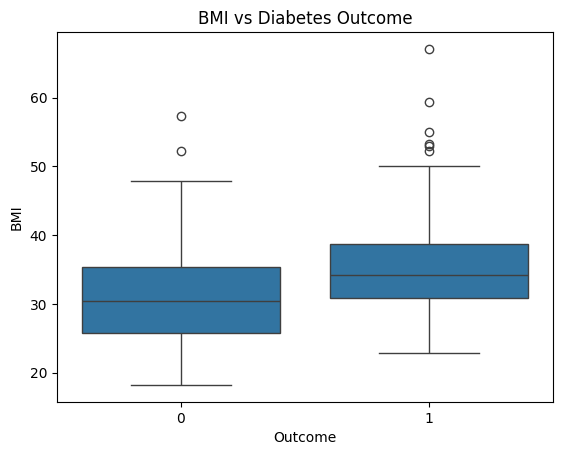

In [ ]:
sns.boxplot(x='Outcome', y='BMI', data=df_hybrid)
plt.title('BMI vs Diabetes Outcome')
plt.show()


- The boxplot shows that patients with diabetes tend to have higher BMI values compared to non-diabetic patients. The median BMI for diabetic patients is clearly higher, indicating a positive relationship between BMI and diabetes outcome. This suggests that BMI is an important feature for diabetes classification

# **Feature Preparation**

In [ ]:
X = df_hybrid.drop('Outcome', axis=1)
y = df_hybrid['Outcome']

print("X shape:", X.shape)
print("y shape:", y.shape)
y.value_counts()


X shape: (768, 8)
y shape: (768,)


,count
Outcome,
0,500
1,268


- The dataset shows a mild class imbalance, with more non-diabetic(500) cases than diabetic cases(268).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (614, 8) (614,)
Test : (154, 8) (154,)


- The dataset was split into training and testing sets using an 80/20 ratio. Stratified sampling was applied to preserve the original class distribution of the target variable. This ensures that both sets are representative and suitable for reliable model evaluation.

-Traning 614 sample - 8 features - 614 outcome
-testing 154 sample - 8 features - 154 outcome

#**Logistic Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Accuracy : 0.7337662337662337
Precision: 0.6031746031746031
Recall   : 0.7037037037037037
F1-score : 0.6495726495726496


The logistic regression model achieved an accuracy of 73.4% with a recall of 70.4%, indicating its ability to correctly identify the majority of diabetic patients. Although some false negatives remain, the results demonstrate that the cleaned dataset enables meaningful and medically relevant predictions.

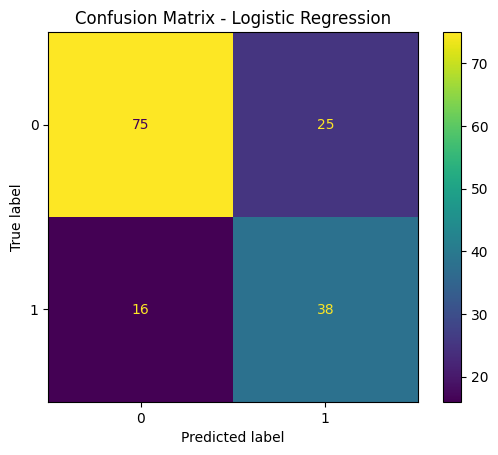

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


before class balance:


True Negatives (82):
82 non-diabetic patients were correctly classified as non-diabetic. This contributes positively to the model’s accuracy.

False Positives (18):
18 non-diabetic patients were incorrectly classified as diabetic. These are false alarms, which are generally acceptable in medical applications compared to missing an actual patient.

False Negatives (27):
27 diabetic patients were incorrectly classified as non-diabetic. This is the most critical error in medical diagnosis and is the main reason for the relatively low recall score.

True Positives (27):
27 diabetic patients were correctly identified by the model. This shows that the model is capable of detecting diabetes, but further improvement is needed to increase detection rates.

After class balance:


True Negatives (75):
75 non-diabetic patients were correctly classified as non-diabetic. This contributes positively to the overall accuracy of the model.

False Positives (25):
25 non-diabetic patients were incorrectly classified as diabetic. These false alarms are acceptable in medical applications, as they are safer than missing actual diabetic cases.

False Negatives (16):
16 diabetic patients were incorrectly classified as non-diabetic. This number is significantly lower compared to the baseline model, indicating an improvement in recall.

True Positives (38):
38 diabetic patients were correctly identified by the model. This demonstrates that the model is more effective at detecting diabetic cases after handling class imbalance